 ## Анализ показателей интернет магазина
 

### Описание проекта 

В данном проекте, необходимо вжиться в роль  аналитика крупного интернет-магазина и вместе с отделом маркетинга подготовить перечень гипотез, направленных на увеличение выручки(т.е. дохода без учета затрат на товар, маркетинг, зарплаты и налоги). Для этого необходимо преоретизировать выдвинутые гипотезы, запустить A/B-тест и проанализировать полученные результаты.

In [1]:
#загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import datetime as dt

In [2]:

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

###  Знакомство с данными и их предобработка 

In [3]:
hypothesis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.columns=hypothesis.columns.str.lower()#приведем название столбцов к змеиному регистру
hypothesis.head(10)

hypothesis  reach  impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   confidence  efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5

В данных нет пропусков, ошибок и дубликатов, а занчит они готовы к дальнейшему анализу .

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
orders.head()

transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B

In [7]:

orders['date'] = pd.to_datetime(orders['date']) #приведем  тип данных  столбца "date" на datetime

In [8]:
print('Количество дубликатов =',orders.duplicated().sum())

Количество дубликатов = 0


Данные корректны,дубликатов и пропусков нет, название столбцов в таблице в нижнем регистре,  тип данных в столбце date приведен к datetime для дальнейшего анализа. 

In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
visitors['date'] = pd.to_datetime(visitors['date']) #приведем  тип данных столбца  "date" на datetime

In [11]:
print('Количество дубликатов =',visitors.duplicated().sum())

Количество дубликатов = 0


Общий вывод по предобработке данных: данные корректны, тип данных в столбцах date в таблицах orders и visitors приведены к datetime, пропусков и дубликатов в таблицах не обнаружено.

###  Приоритизация гипотез 

Перейдем к приоретизации гипотез. Необходимо применить  фреймворк ICE(Impact — влияние, Confidence — уверенность, Ease — легкость реализации) для приоритизации гипотез. Для этого необходимо отсортировать гипотезы   по убыванию приоритета.
Затем применим  фреймворк RICE(Reach — охват, Impact — влияние, Confidence — достоверность, Effort — усилия) для приоритизации гипотез и отсортируем их по убыванию приоритета.


In [12]:
hypothesis


hypothesis  reach  impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   confidence  efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5

In [13]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)
hypothesis['RICE'] = (hypothesis['reach']  *hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [14]:
pd.set_option('display.max_colwidth', 500)
hypothesis[['ICE', 'hypothesis']].sort_values(by='ICE', ascending=False)

ICE  \
8  16.2   
0  13.3   
7  11.2   
6   8.0   
2   7.0   
1   2.0   
5   1.3   
3   1.1   
4   1.0   

                                                                                                     hypothesis  
8                                                       Запустить акцию, дающую скидку на товар в день рождения  
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию  
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов  
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов  
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар  
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей

In [15]:
pd.set_option('display.max_colwidth', 500)
hypothesis[['RICE', 'hypothesis', 'reach']].sort_values(by='RICE', ascending=False)

RICE  \
7  112.0   
2   56.0   
0   40.0   
6   40.0   
8   16.2   
3    9.0   
1    4.0   
5    4.0   
4    3.0   

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   

   reach  
7     10  
2      8  
0      3  
6      5  
8      1  
3      8  
1      2  
5      3  
4      3

### Вывод: 
Заметны различия при приоретизации по разным фреймворкам. Во-первых  меняется тройка лидеров : при приоретизации черз ICE это гипотезы с индексами 8, 0, 7 , а приоретизации через  RICE это 7,2,0(позиции по приоритету сохранены для обоих случаев). При этом 8-я гипотеза, которая была самой приоритетной по ICE стала занимать пятую позицию по RICE, а 2-я гипотеза, поднялась с пятой позиции на вторую. Это обусловлено учетом охвата пользователей, которых затронет изменение(т.е. параметр Reach). В связи с этим, 7-я гипотеза с третьей строчки после приоретизации по фреймворку ICE поднялась на первую по RICE т.к. параметр охвата у неё максимальный(а именно 10), в то время как у 8-я гипотеза имеет минимальный показатель охвата (а именно 1). В связи с этим, наиболее приоритетной для дальнейшего проведения тестирования можно назвать 7-ю  гипотезу и далее, 2-я и 0-я гипотезы.

###  Анализ A/B-теста

#### График кумулятивной выручки 

In [16]:
orders.sample(3)# получим случайно отобранный список 3х случайных элементов таблицы orders

transactionId   visitorId       date  revenue group
9       1506739906  1882260405 2019-08-15     1855     B
800     2017680897   399216493 2019-08-05     1640     A
552      151437276  3908431265 2019-08-06     1510     A

In [17]:
#Рассчитаем медианную  выручку за день для каждой группы
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A    112473
B    147274
Name: revenue, dtype: int64

In [18]:
visitors.sample(3)# получим случайно отобранный список 3х случайных элементов таблицы orders

date group  visitors
8  2019-08-09     A       617
43 2019-08-13     B       769
57 2019-08-27     B       720

In [19]:
#Сравним, одинаковы ли реперные даты и группы в таблице vistors для дальнейшего объединения с таблицей orders
orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

date group
0  2019-08-01     A
1  2019-08-01     B
2  2019-08-02     A
3  2019-08-02     B
4  2019-08-03     A
..        ...   ...
57 2019-08-29     B
58 2019-08-30     A
59 2019-08-30     B
60 2019-08-31     A
61 2019-08-31     B

[62 rows x 2 columns]

In [20]:
compare_dg = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True) == \
                        visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)
compare_dg

date  group
0   True   True
1   True   True
2   True   True
3   True   True
4   True   True
..   ...    ...
57  True   True
58  True   True
59  True   True
60  True   True
61  True   True

[62 rows x 2 columns]

In [21]:
compare_dg['date'].sum() , compare_dg['group'].sum()

(62, 62)

### Вывод:
Данные в реперных дат для груп в таблицах visitors и orders совпадают, поэтому можно их объединять, для чего создадим таблицу cumulativeData  для рассчета выручки с накоплением.



In [22]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(10)

date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845
5 2019-08-03     B      61      59   380996      1803
6 2019-08-04     A      84      77   425699      2562
7 2019-08-04     B      78      75   489567      2573
8 2019-08-05     A     109     100   549917      3318
9 2019-08-05     B     101      98   581995      3280

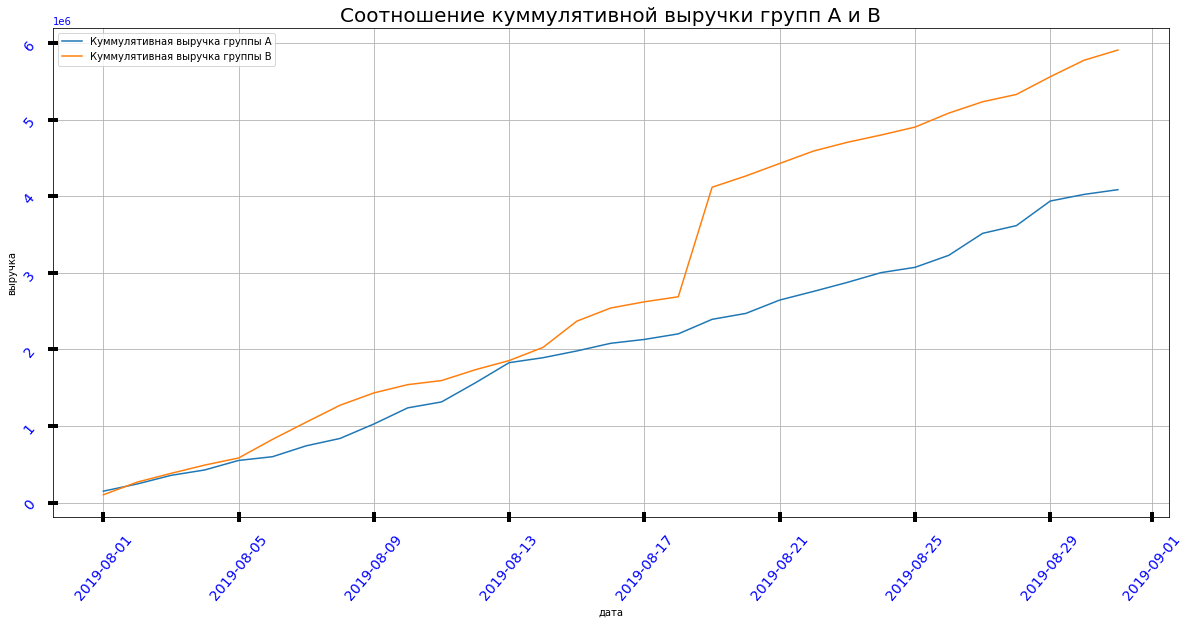

In [23]:
#Тепрерь построим графики куммулятивной(с накоплением) выручки для обеих групп
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(20,9))
plt.title('Соотношение куммулятивной выручки групп А и В', fontsize = 20)
plt.xlabel('дата')
plt.ylabel('выручка')
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Куммулятивная выручка группы A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Куммулятивная выручка группы B')
plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 10,    #  Длинна делений
               width = 4,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               labelsize = 14,    #  Размер подписи
               labelcolor = 'blue',    #  Цвет подписи
            rotation= 50 )    #  Поворот подписей
plt.grid()
plt.legend()
plt.show()

### Вывод:
В первой половине месяца видно, что выручка в группе 'B' растёт чуть быстрее, чем в 'A'.  5 и 13 августа выручка в обеих группах практически идентична, но далее наблюдается четкая дивергенция( а примерно с 18  по 19 августа происходит резкий подъем выручки в группе 'B' , после чего выручка в группе 'B' расчстет с заметным отрвывом в большую сторону, чем в группе 'A' что возможно связано с единовременными заказами или одним крупным заказом в указанный период, что и создало дивергенцию в изначально соразмерном росте выручки в обеих группах.


In [24]:
#Посмотрим сколько заказов было в переиод с 17 по 21 августа, в который попадает всплеск кумулятивной выручки
cumulativeRevenueB.query(' "2019-08-17" <= date <= "2019-08-21" ')

date  revenue  orders
33 2019-08-17  2620790     373
35 2019-08-18  2686621     382
37 2019-08-19  4116541     403
39 2019-08-20  4263815     423
41 2019-08-21  4426892     437

In [25]:
#Изучим отдельно самые крупные заказы  19 августа и сопоставим с медианным значением
print('Медианное значение  заказа 19 августа =',orders.query(' date == "2019-08-19" ')['revenue'].median())
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(10)


Медианное значение  заказа 19 августа = 2630.0


transactionId   visitorId       date  revenue group
425      590470918  1920142716 2019-08-19  1294500     B
530     3970235543  2912540959 2019-08-19    43990     A
527     1570513684  2837914161 2019-08-19    33405     B
421     3765974140  1357170471 2019-08-19    31680     A
461     2683113224   154576532 2019-08-19    26550     B
525     3031564664   393266494 2019-08-19    21550     A
368     3268879337  2536252163 2019-08-19    20026     B
366     2037051350  1957949546 2019-08-19    16770     A
463     4170537404   290022471 2019-08-19    16480     B
531     4016435970  4017075195 2019-08-19    13390     A

### Вывод:
Резкий прирост кумулятивной выручки в группе 'B' объясняется наличием заказа № 425, на который приходится 1.294500 млн в группе 'B', что в 492 раза выше медианного значения в 2630 рублей и составляет 31 % от дневной выручки 19 августа (1294500 /4116541). 'Этот единичный крупный заказ можно отнести к выбросам. 	




####  График кумулятивного среднего чека

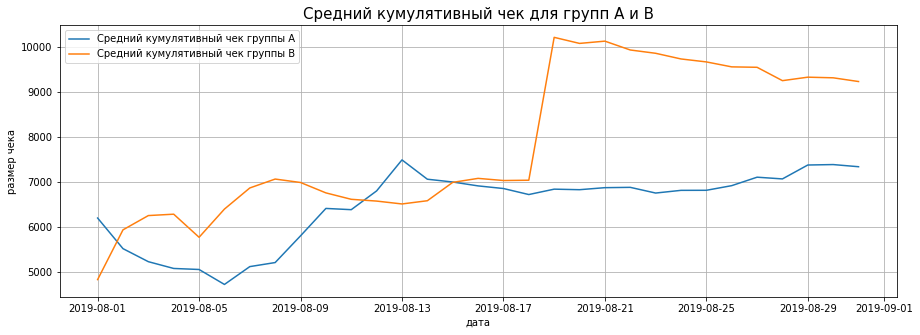

In [26]:
#Построим графики среднего кумулятивного чека для групп 'A' и 'B', для этого разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(15,5))
plt.title('Средний кумулятивный чек для групп А и В', fontsize = 15)
plt.xlabel('дата')
plt.ylabel('размер чека')
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Средний кумулятивный чек группы B')
plt.legend();





### Вывод:
Графики среднего кумулятивного чека весьма схожи с графиками кумулятивной выручки, но  различаются отдельные точечные события: 13 августа средний чек был выше в группе 'A' (в этот день кумулятивная выручка обеих групп была практически в паритете), но далее такж идут расхождения. Средний чек в группе 'B' за счет заказа №425 идет вверх 19 августа, но уже потом наблюдается нисходящий тренд, в то время как в группе 'A' наблюдается пусть и слабое, но восходящее движение, что отличает данные графики от графиков кумулятивной выручки. 

#### График относительного изменения кумулятивного среднего чека 

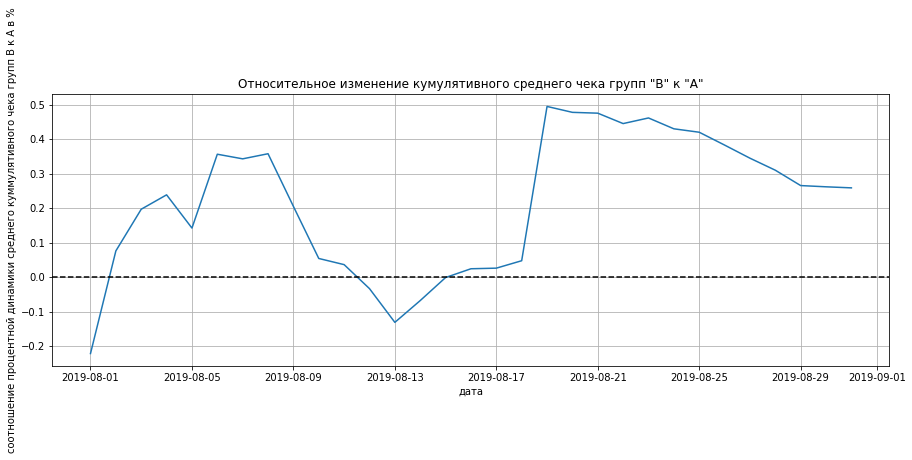

In [27]:
#Объединим данный в один датафрейм,
#чтобы построить график относительного изменения кумулятивного среднего чека группы 'B' к группе 'A'.
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.xlabel('дата')
plt.ylabel('соотношение процентной динамики среднего куммулятивного чека групп B к А в %')
plt.axhline(y=0, color='black', linestyle='--') ;

### Вывод: 
Анализируя построенный график, можно говорить, что средний чек 'B' к 'A' перешел паритет еще до середины периода с 1 по 2 августа, а рост, с локальными просадками(5 августа) наблюдаелся вплоть до 7 августа, после чего наблюдается падения вплоть до 13 августа, с пробитием вниз линии паритета в районе 12 августа. Но уже после 13 августа начинается новое восходящее движение до итоговой точки вплоть до 19 августа, где  кумулятивный средний чек 'B' к 'A' превышал 50 % на что безусловно повлиял аномальный заказ №425.

#### График кумулятивной конверсии 

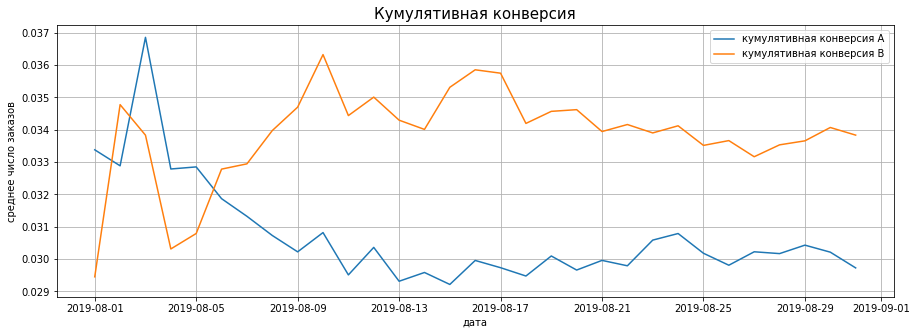

In [28]:
#Аналогично проанализируем график кумулятивной конверсии:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='кумулятивная конверсия A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='кумулятивная конверсия B')
plt.title('Кумулятивная конверсия',fontsize = 15)
plt.xlabel('дата')
plt.ylabel('среднее число заказов')
plt.legend();
# plt.axis(["2019-08-01", '2019-08-31', 0.028, 0.038]);

### Вывод:
В начале месяца конверсия конверсия 'A' была больше, но уже 3 августа, достигнув максимуа за весь рассматриваемый период она начинает снижение, и начиная с 8 августа до конца периода двигается в корридоре 0,029-0,031. В это же врем,  конверсия группы 'B' совершив движение вверх, к  4 августа достигла локального минимума и далее пошла в рост, превысив конверсию группы 'A' к 6 августа  и выйдя на пик 9 августа(выше 0,036 ) продолжила движение в корридоре  0,033- 0,034 (с локальными подьемами почти выше 0,035 с 14 по 17 августа) до конца рассматриваемого периода. Таким образом, можно констратировать, что конверсия 'B' превысила 'A' 6 августа и большую часть месяца была выше. 

####  График относительного изменения кумулятивной конверсии


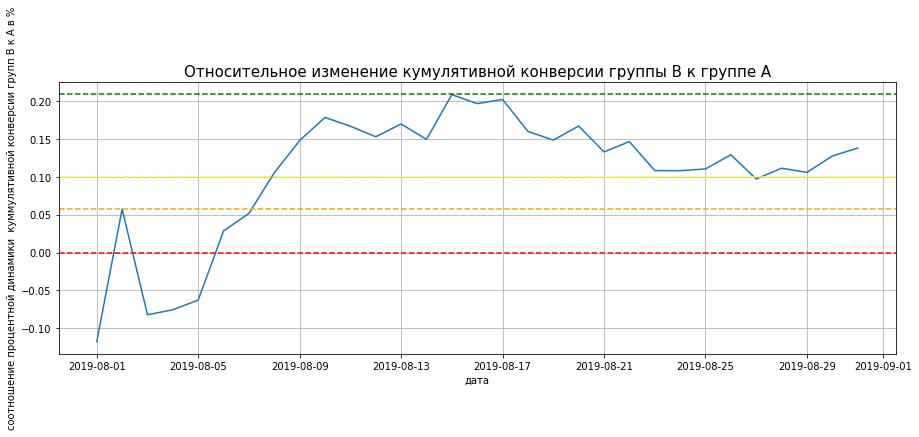

In [29]:
#Построим график относительного изменения кумулятивной конверсии группы 'B' к группе 'A'. 
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A',fontsize = 15)
plt.xlabel('дата')
plt.ylabel('соотношение процентной динамики  куммулятивной конверсии групп B к А в %')

plt.axhline(y=0, color='red', linestyle='--') 
plt.axhline(y=0.1, color='yellow', linestyle='--')
plt.axhline(y=0.21, color='green', linestyle='--')
plt.axhline(y=0.057, color='orange', linestyle='--');
 
    
    

### Вывод:
График весьма схож  сграфиком кумулятивной конверсии группы 'B'. С 1 авгста по 6 - несколько дней когда конверсия в 'A' была больше на 5%( кроме 2 августа), а после 6 августа наблюдается  рост конверсии в группе 'B' до 10%  7 августа и до 15 % 9 августа. Стоит отметить что 2 августа рост кумулятивной коверсии отмечен в обоих группах(согласно графику 3.4), что может иметь под собой стимуляцию потребительского спроса. С 6 августа превышение конверсии 'B' над 'A' наюблюдается до конца рассматриваемого периода, двигаеясь в корридоре 10-15 %, с локальными пиками 14-17 августа до уровня выше 20%. 



#### График количества заказов по пользователям 

In [30]:
#Построим точечный график количества заказов по пользователям.

In [31]:
orders.sample(3)

transactionId   visitorId       date  revenue group
1160      290089453  1571986409 2019-08-14     3480     B
165       565328425   309675944 2019-08-17     6990     B
765      1457259561  2421265884 2019-08-07      990     B

In [32]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5

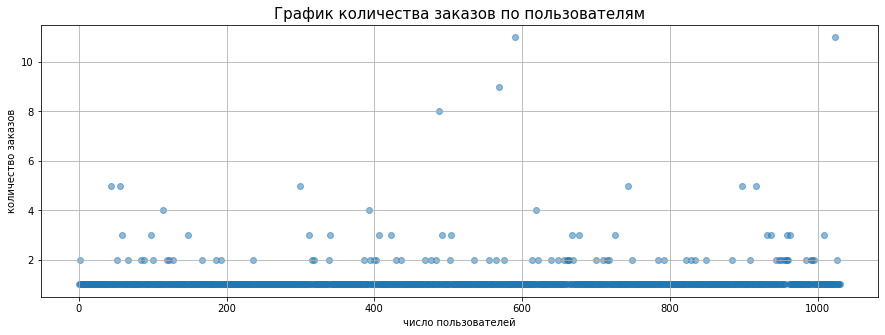

In [33]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям',fontsize = 15)
plt.xlabel('число пользователей')
plt.ylabel('количество заказов')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) ;

### Вывод:
Болишнство пользователей которые совершили только 1 заказ, тех кто совершил   2-мя заказа заметно меньше, а пользоватлей с 3-мя заказами уже единицы(пользователей с числом заказов больше 3х еще меньше,что воможно стоит отнести к аномалиям). Поэтому необходимо посчитать процентили 95 и 99. 


#### Граница заказов для определения аномальных пользователей

In [34]:
#Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Определим границу для определения аномальных пользователей.
print('Рассчитаем 95 и 99 перцентили по заказам : ', np.percentile(ordersByUsers['orders'], [95, 99])) 

Рассчитаем 95 и 99 перцентили по заказам :  [2. 4.]


In [35]:
#Далее рассчитаем все процентили с 95 по 99
print('перцентили c 95 по 99 (по заказам) : ', np.percentile(ordersByUsers['orders'], [95,96,97,98, 99])) 
#*Теперь видно, что большинство (98%) пользователей делают 1 или 2 заказа. Всё что выше - это аномалия*

перцентили c 95 по 99 (по заказам) :  [2. 2. 2. 3. 4.]


### Вывод:
Не более 5% пользователей оформляли больше чем 2 заказа, в связи с чем  можно выбрать уровень в 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по этой границе.


#### График стоимостей заказов 

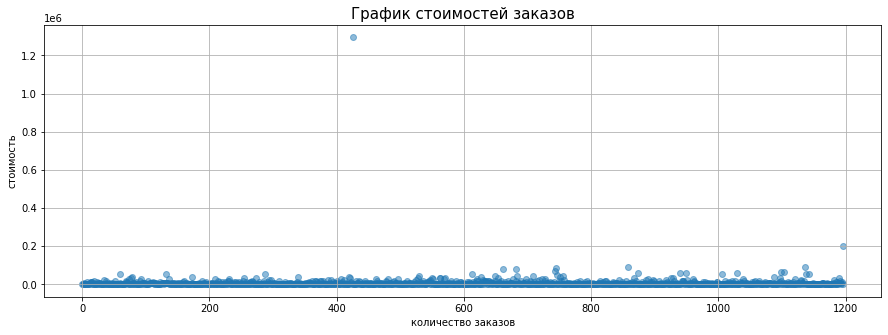

In [36]:
#Построим точечный график стоимостей заказов.
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов',fontsize = 15)
plt.xlabel('количество заказов')
plt.ylabel('стоимость')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

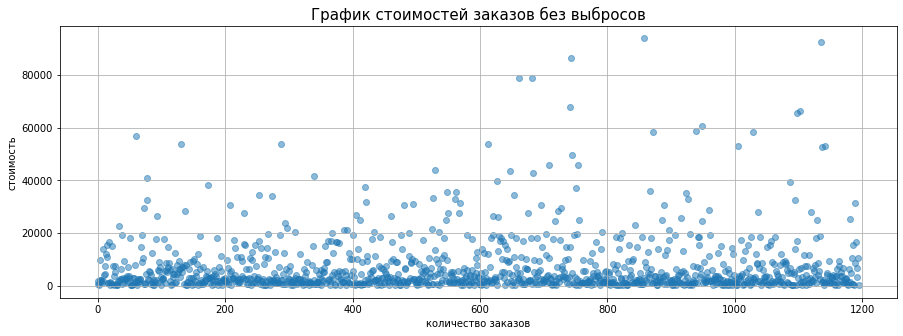

In [37]:
#Построим более наглядный график, для это уберем явные выбросы с 'revenue' большим 199000:

norm_orders = orders[orders['revenue']<=199000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов без выбросов',fontsize = 15)
plt.xlabel('количество заказов')
plt.ylabel('стоимость')
plt.scatter(xn_values, norm_orders, alpha=0.5);

### Вывод:
Хорошо виден тот аномальный заказ №425 на 1.294 млн и еще один на сумму в примерно 200 тысяч, остальные  заказы, в целом,   укладываются в корридор примерно ве 100 тысяч. Для определение более точны границ аномалий необходимо рассчитать перцентили. 


#### Граница для определения аномальных заказов (по выручке) 

In [38]:
#Рассчитаем 95-й и 99-й перцентили стоимости заказов. Определим границу для выделения  аномальных заказов.
print('95 и 99 перцентили по выручке заказов соответствеено: ', np.percentile(orders['revenue'], [95, 99])) 


95 и 99 перцентили по выручке заказов соответствеено:  [28000.  58233.2]


### Вывод:
95% заказов ниже 28000, 99% заказов нижк суммы в 58233.2 , что и можно принять в качестве  границы для определения аномальных значений.

####  Различия в конверсии между группами по «сырым» данным

Соберем все данные по заказам и визитам в одну таблицу. :


In [39]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [40]:
#Теперь объединим  данные в одну таблицу:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.sample(3)

date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
30 2019-08-31              12            61833              20   
24 2019-08-25              10            68634              14   
22 2019-08-23              25           117788              15   

    revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
30           133129                 557              4084803   
24           102862                 451              3070704   
22           113969                 426              2874367   

    ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
30                 640              5907760               699   
24                 507              4901584               621   
22                 477              4703216               468   

    visitorsPerDateB  visitorsCummulativeA  visitorsCummulativeB  
30               718                 18736                 18916  
24               679                 14943                 15127  
22               546                 13927                 14070

Применим критерий U-критерий Манна-Уитни и округлимм p-value, до трёх знаков после запятой. В Sample A сохраним выборку, где каждый элемент соответсвует числу заказов для каждого пользователя(даже если заказов нет). Для рассчета конверсии разделим количество заказов на число пользователей  и найдем среднее в группе Sample A через  mean(). Таким же образом   найдём конверсию группы B.
Далее расчитаем динамику   конверсии группы 'B' относительно группы 'A'.
Как H0( нулевую гипотезу) определим то, что что статистически значимые различия  конверсии между группами отсутствуют,а H1 будет утверждать, чтостатистически значимые различия  в конверсии между группами есть.

In [41]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


### Вывод: 
p-value = 0.017 (что уровня статистичекой значимости  альфа  0.05), а значит, мы отвергаем H0, т.к. есть статистические различия в конверсии между группами 'A' и 'B'. Превышение конверсии группы 'A' над 'B' составляет  13.8% .

####  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным 

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() данные о выручке с заказов (пороговое значение возьмём равное 5%). И найдём относительные различия в среднем чеке между группами.

За нулевую гипотезу возьмём что: "статистически значимых различий в средних чеках между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [42]:
print("alpha =",0.05)
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 





alpha = 0.05
P-value: 0.729
Относительные различия: 0.259


### Вывод: 
p-value = 0.729  что значительно больше 0.05, а значит нет причин отвергать  нулевую гипотезу о том, что статистически значимых различий в конверсии между группами есть. Это значит,что по «сырым» данным средние чеки групп 'A' и 'B' не различаются. Также отметим. что средний чек  группы 'B' над 'A' больше на 25.9% .


#### Различия в конверсии между группами по «очищенным» данным 

В пункте 4.6  мы приняли за аномальных пользователей тех, кто совершил 3 и более заказа или сумма заказа пользователя превышала  58233.2. Сделаем срезы пользователей с числом заказов более 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233.2 — usersWithExpensiveOrders. Объединим  аномальные заказы  в таблице abnormalUsers. Выясним число аномальных пользователей методом shape().



In [43]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print('Число аномальных пользователей =' ,len(abnormalUsers)) 


1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
dtype: int64
Число аномальных пользователей = 20


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [44]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 
# sampleAFiltered.value_counts() , sampleBFiltered.value_counts()

Применим статистический критерий Манна-Уитни к полученным выборкам,

За H0, нулевую гипотезу, возьмём то,  что статистически значимые различия в конверсии между группами отсутствуют,  тогда H1, альтернативная гипотеза будет гласить, что статистически значимые различия есть.

In [45]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.014
Относительный показатель 'B' и 'A' = 0.151


### Вывод: 
p-value = 0.009, что меньше 0.05. Значит, H0, о том что статистически значимые различия в конверсии между группами 'A' и 'B' отсутствует, нами отвергается. Таким образом, по данным  очищенным от аномалий,  различия в конверсии групп'A' и 'B' есть. А превышение конверсии группы 'B' над 'A' составляет 19,3% , что превышает результат по  «сырым» данными на 5.5 процентных пункта

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным 

А теперь рассмотрим, изменился ли средний чек.

За нулевую гипотезу(H0) возьмём что статистически значимых различий в средних чеках между группами 'A' и 'B'нет, тогда альтернативная гипотеза(H1) будет, что статистически значимые различия есть.

In [46]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.959
Относительный показатель 'B' и 'A' = -0.014


### Вывод:
P-value значительно больше 0.05(0,86), а значит, нет оснований  отвергать нулевую гипотезу, т.е.  в среднем чеке нет различий, как и в случае с резульатом по "сырым данным" . При этом средний чек группы 'B' оказался ниже на 1,8%  среднего чека группы 'A', в то время как по "сырым" данным средний чек группы 'B' больше на 25,9%, что обусловлено влиянием заказа  №425 на сумму 1,29 млн 

#### Общий  Решение по результатам теста 

По результатам тестирования можно сделать следующие выводы:
Различия в конверсии между группами 'A' и 'B' присутствуют как по  "сырым" , так и по "очищенным" данным. Превышение конверсии  группы 'B' над 'A' равен 19,3% по "очищенным" данным  и 13.8% по "сырым" данным.

В это же время, различия в среднем чеке  по "сырым" и по "очищенным" данным групп 'A' и 'B' отстутствуют, несмотря на то, что по "очищенным" данным средний чек группы 'B' на 1,8 %  ниже среднего чека группы 'A' по "очищенным" данным, в то время как по "сырым" данным, он  больше  на 25,9%, что обусловлено влиянием заказа  №425 на сумму 1,29 млн.
Исходя из этого, можно остановить тестирования и сделать вывод, что конверсия клиентов в группе 'B' выше, чем в группе 'A', в то время как средний чек в обоих группах почти идентичен.
Вывод  update:
Фиксируем победу группы 'B'. Гипотеза о том, что добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(самая приоритетная) оказалась верна(если сделать допущение, что H0 это то что конверсия не изменится(т.е. выручка то же не изменится), а H1 что добавление форм подписки повлияет на изменение выручки(и соответственно конверсии)
После внедрения гипотезы конверсия увеличилась на 19,3%, средний чек не изменился.